# Exploring sentiment in Yelp

##Goal
Compare the positivity of Yelp reviews between cities in the dataset. Where are reviewers happiest? 

This has various applications. For example, maybe a national chain is doing coaching of its employees. If they get ratings in the store (not through Yelp), they can normalize the ratings depending on the Yelp ratings per city. In other words, this could account for city-to-city differences. Another application may be user testing. If a company wants to test out a new food or service, they can find cities where people might be more easily pleased or not.

##Target users
Students might be intimidated by Natural Language Processing (NLP). They want to learn for class or for job interviews where they may be asked for questions like in the sample applications above.

##Requirements
* Touches on NLP
* Does not use jargon
* Quick and easy to look at (free and of a length that is bite-sized. Khan Academy is 3-8 minutes so use that time frame if video. Otherwise, text file)
* Use Yelp dataset (easily available)
* Able to be run locally (fits into memory of standard laptop and does not require AWS)

##Possible approaches
* Compare :) versus :( in reviews
- rate of :) per post, which is defined as sum(:) )/number_posts
* Use Yelp positivitity library
* Use other NLP sentiment analysis library
* Build own sentiment analysis library

##Future directions
To see if check-ins are correlated to the positivity

##Dataset
We used a subset of the 2016 Yelp data challenge dataset. For more information, please see https://www.yelp.com/dataset_challenge. We used a subset provided by the University of Illinois Data Science club.

We considered two datasets: reviews and businesses. Reviews provided the text of the reviews where the business table provided the city names. We found the cities of the reviews by joining on the business id. 

The dataset subset we used had 5 cities and we excluded Las Vegas, because it had significantly more businesses than the other four cities (Tempe, AZ; Henderson, NV; Charlotte, NC; and Madison, WI), and may have different behavior due to the high number of tourists.

##Findings
We found that Henderson and Tempe had slightly higher happiness, as measured by the proportion of smiley faces of all the smiley/frowny emoticons. 

This trend was consistent with results from an external API (http://text-processing.com/api/sentiment/) that provides sentiment scores based on a Naive Bayes model trained on movie reviews.    

In contrast, the stars rating showed no statistically significant differences between cities. This suggests that while comparing stars likely shows no insights on city-to-city differences, further sentiment analysis could lead to interesting results.


#Yelp review data exploration

In [1]:
import matplotlib.pyplot as plt

In [37]:
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import nltk

In [26]:
raw_data = pd.read_csv('ADSA_yelp_reviews_subset.csv', sep='\t')

In [28]:
raw_data.head(5)

,business_id,date,review_id,stars,text,type,user_id,votes
0,mAdtkJLHIVjbDnZlc5aQYg,2009-11-17,Vzx-nIUGByybEMrAiCeIXg,5,"I arrived late-ish, tired from a grueling trip...",review,rTvFiQSg_cLHejrT1jA0UA,"{'funny': 1, 'cool': 2, 'useful': 2}"
1,mAdtkJLHIVjbDnZlc5aQYg,2010-04-30,rQxSeddCqCTlO9dJyPZocA,2,"This hotel was ok, the Host -Quntin was great....",review,AzTPtN_WvmvRXtR_DIX_Ww,"{'funny': 1, 'cool': 0, 'useful': 2}"
2,mAdtkJLHIVjbDnZlc5aQYg,2010-08-03,EAQZjkrfYuAdKClSnKssCQ,3,"Perfect airport hotel. Decent rooms, starting...",review,TtufkDWfOWtGpm-vXnLSaw,"{'funny': 1, 'cool': 0, 'useful': 1}"
3,mAdtkJLHIVjbDnZlc5aQYg,2010-10-01,em4aEhO7iMjN82_Z76c9FQ,4,"Nice hotel, clean rooms, OK food. I would visi...",review,E2yke_7HUG4-BXeE9kLWdA,"{'funny': 0, 'cool': 0, 'useful': 0}"
4,mAdtkJLHIVjbDnZlc5aQYg,2011-04-17,Ris5s6CYFBPXJzLoVwfx-g,2,"Lobby, restaurant, bar and internet area all l...",review,8N481iGgsUYA1-TtESOntw,"{'funny': 2, 'cool': 2, 'useful': 4}"


In [38]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 856144 entries, 0 to 856143
Data columns (total 8 columns):
business_id    856144 non-null object
date           856144 non-null object
review_id      856144 non-null object
stars          856143 non-null float64
text           856142 non-null object
type           856142 non-null object
user_id        856142 non-null object
votes          856142 non-null object
dtypes: float64(1), object(7)
memory usage: 58.8+ MB


In [39]:
business_table = pd.read_csv('ADSA_yelp_business_subset.csv', sep='\t')

/Users/wathid/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (1,14,21,30,49,52,62,64,66,70,84,89,92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [90]:
bus_id_mad = business_table['business_id'][business_table['city']=='Madison']
bus_id_hen = business_table['business_id'][business_table['city']=='Henderson']

In [91]:
bus_id_mad.shape

(1758,)

In [92]:
bus_id_hen.shape

(2130,)

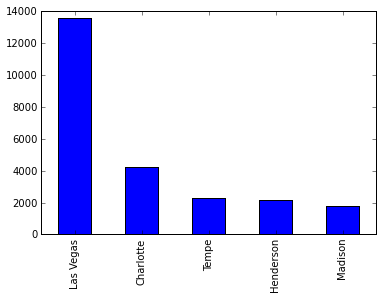

In [88]:
business_table['city'].value_counts().plot(kind='bar')


In [89]:
business_table['city'].value_counts()

Las Vegas    13600
Charlotte     4224
Tempe         2258
Henderson     2130
Madison       1758
dtype: int64

In [142]:
#logic_id_mad = np.array([bus_id in bus_id_mad.values for bus_id in raw_data['business_id']])
#review_mad = raw_data[logic_id_mad]
reviews = pd.merge(raw_data, business_table, on='business_id')
review_mad = reviews[reviews['city']=='Madison']
review_hen = reviews[reviews['city']=='Henderson']
review_tem = reviews[reviews['city']=='Tempe']


In [144]:
review_cha = reviews[reviews['city']=='Charlotte']

# logic_id_hen = np.array([bus_id in bus_id_hen.values for bus_id in raw_data['business_id']])
# review_hen = raw_data[logic_id_hen]
review_cha.shape

(86952, 112)

In [126]:
for thing in raw_data['business_id']:
    if thing == '1IxCNVVW9aKbK3BfQpI7eg':
        print 'yes'


yes
yes


In [151]:
print review_mad.shape
print review_cha.shape
print review_hen.shape
print review_tem.shape

(37071, 112)
(86952, 112)
(49827, 112)
(64978, 112)


In [180]:
text_review_mad= review_mad['text']
text_review_cha= review_cha['text']
text_review_hen= review_hen['text']
text_review_tem= review_tem['text']

In [205]:
#nltk.download()
#from nltk.book import *
#counting smiley face in a
from scipy.stats import sem as error_bar
def smiley_counter(text):
    return text.count(':)')+text.count(':-)')+text.count(':D')
#frowny counter
def frowny_counter(text):
    return text.count(':(')+text.count(':-(')

def summary_stat(array):
    return array.mean(), error_bar(array)
#rates smiley
rate_smile_mad, smile_mad_error = summary_stat(np.array([smiley_counter(text) for text in text_review_mad]))
rate_smile_hen, smile_hen_error = summary_stat(np.array([smiley_counter(text) for text in text_review_hen]))
rate_smile_cha, smile_cha_error = summary_stat(np.array([smiley_counter(text) for text in text_review_cha]))
rate_smile_tem, smile_tem_error = summary_stat(np.array([smiley_counter(text) for text in text_review_tem]))
#rate frowny
rate_frowny_mad, frowny_mad_error = summary_stat(np.array([frowny_counter(text) for text in text_review_mad]))
rate_frowny_hen, frowny_hen_error = summary_stat(np.array([frowny_counter(text) for text in text_review_hen]))
rate_frowny_cha, frowny_cha_error = summary_stat(np.array([frowny_counter(text) for text in text_review_cha]))
rate_frowny_tem, frowny_tem_error = summary_stat(np.array([frowny_counter(text) for text in text_review_tem]))



In [206]:
city_list = [1,2,3,4]
rate_smiley_list = np.array([rate_smile_mad, rate_smile_hen, rate_smile_cha, rate_smile_tem])
error_smiley_list = np.array([smile_mad_error, smile_hen_error, smile_cha_error, smile_tem_error])
rate_frowny_list = np.array([rate_frowny_mad, rate_frowny_hen, rate_frowny_cha, rate_frowny_tem])
error_frowny_list = np.array([frowny_mad_error, frowny_hen_error, frowny_cha_error, frowny_tem_error])
rate_ratio = rate_smiley_list/(rate_smiley_list+rate_frowny_list)
error_ratio = np.sqrt(error_smiley_list**2+(error_smiley_list+error_frowny_list)**2
#rate_ratio = [rate_smiley_list[i]/float(rate_smiley_list[i] + rate_frowny_list[i]) for i in range(len(rate_smiley_list))]

([<matplotlib.axis.XTick at 0x15a3c6050>,
 <a list of 4 Text xticklabel objects>)

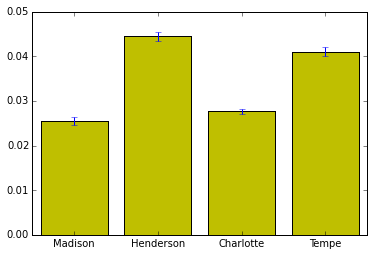

In [208]:
#Comparing happiness 
import pylab
LABELS = ['Madison', 'Henderson', 'Charlotte', 'Tempe']

pylab.bar(city_list, rate_smiley_list, align='center', yerr=error_smiley_list, color='y')
pylab.xticks(city_list, LABELS)


([<matplotlib.axis.XTick at 0x161395b90>,
 <a list of 4 Text xticklabel objects>)

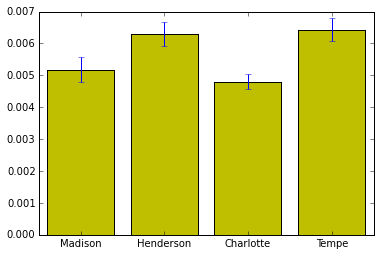

In [209]:
pylab.bar(city_list, rate_frowny_list, align='center', yerr=error_frowny_list, color='y')
pylab.xticks(city_list, LABELS)


([<matplotlib.axis.XTick at 0x10b8b20d0>,
 <a list of 4 Text xticklabel objects>)

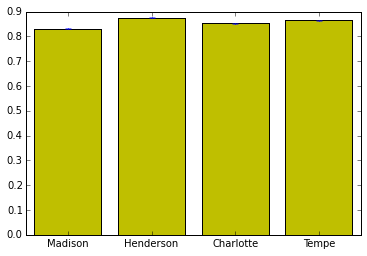

In [210]:
pylab.bar(city_list, rate_ratio, align='center', yerr=error_ratio, color='y')
pylab.xticks(city_list, LABELS)


In [218]:
# next step is to try classifying the text part of the reviews as positive or negative
from urllib2 import Request, urlopen, URLError
import json
def emotion_analyzer(text):
    request = Request('http://text-processing.com/api/sentiment/')

    try:
        response = urlopen(request, 'text="' + text[0:79995] + '"')
        scores = response.read()
        resp_dict = json.loads(scores)
        return resp_dict['probability']['pos']
    except URLError, e:
        print 'No kittez. Got an error code:', e
        
    

In [253]:
#sentiment_arr_mad = np.array([emotion_analyzer(text) for text in text_review_mad[0:500]])
#sentiment_arr_hen = np.array([emotion_analyzer(text) for text in text_review_hen[0:500]])
#sentiment_arr_cha = np.array([emotion_analyzer(text) for text in text_review_cha[0:500]])
sentiment_arr_tem = np.array([emotion_analyzer(text) for text in text_review_tem[0:500]])


No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez. Got an error code: HTTP Error 503: SERVICE UNAVAILABLE
No kittez.

KeyboardInterrupt: 

In [228]:
sentiment_arr_cha

array([0.6450652817720608, 0.21536811207962137, 0.6202840064774997,
       0.7095549195284949, 0.5698278093557959, 0.174985554519289,
       0.16646754846754466, 0.6351639355745835, 0.11511926242960477,
       0.4592488146486448, 0.15242301543416797, 0.5142737855791255,
       0.18905399306365173, 0.40272222197314833, 0.6988813205857485,
       0.7024402832882204, 0.21080400503969993, 0.17571637756318684,
       0.3512617812096742, 0.2959713658156684, 0.4908203879491962,
       0.41031998427013633, 0.8842859759644921, 0.39942392545965116,
       0.3924833355343743, 0.7987421149465599, 0.19832245533500326,
       0.5371256599849852, 0.18257383518520195, 0.358016698475076,
       0.5819723449322293, 0.48793748360510314, 0.6719501518160578,
       0.7428793635630657, 0.6091334610859824, 0.5267924429565768,
       0.6384092275507695, 0.5848944393723622, 0.25423203631130126,
       0.6227317069607654, 0.34305895567275263, 0.6016970071362889,
       0.6483796934174337, 0.3029397134349609, 0.

(array([ 63.,  61.,  48.,  45.,  63.,  61.,  55.,  45.,  26.,  33.]),
 array([ 0.09343117,  0.17419974,  0.25496831,  0.33573688,  0.41650545,
         0.49727401,  0.57804258,  0.65881115,  0.73957972,  0.82034829,
         0.90111686]),
 <a list of 10 Patch objects>)

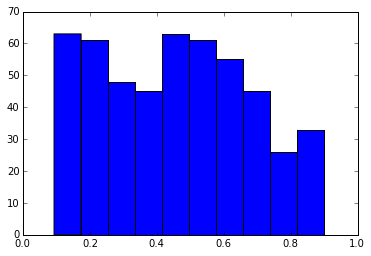

In [236]:
#positivity probability
pylab.hist(sentiment_arr_mad)


(array([ 30.,  74.,  47.,  64.,  72.,  60.,  55.,  46.,  33.,  19.]),
 array([ 0.06332407,  0.15255351,  0.24178294,  0.33101238,  0.42024182,
         0.50947126,  0.5987007 ,  0.68793014,  0.77715957,  0.86638901,
         0.95561845]),
 <a list of 10 Patch objects>)

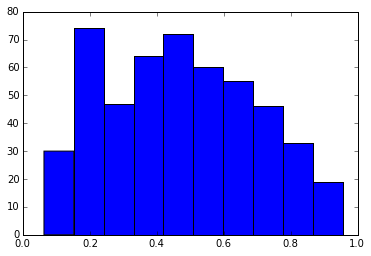

In [233]:
pylab.hist(sentiment_arr_hen)
#This shows that the data is not normally distributed. It looks somewhat bimodal.


([<matplotlib.axis.XTick at 0x16236f150>,
 <a list of 3 Text xticklabel objects>)

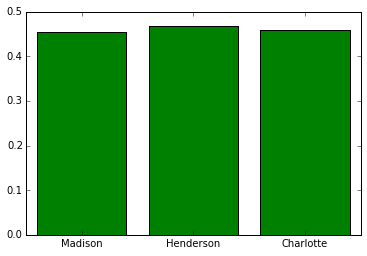

In [238]:

pos_mad = np.median(sentiment_arr_mad)
pos_hen = np.median(sentiment_arr_hen)
pos_cha = np.median(sentiment_arr_cha)


pylab.bar([1,2,3], [pos_mad, pos_hen, pos_cha], align='center', color='g')
pylab.xticks([1,2,3], ['Madison', 'Henderson', 'Charlotte'])

In [251]:
#how do these compare to stars?
star_mad, star_mad_error = summary_stat(np.array(review_mad['stars_x']))
star_cha, star_cha_error = summary_stat(np.array(review_cha['stars_x']))
star_tem, star_tem_error = summary_stat(np.array(review_tem['stars_x']))
star_hen, star_hen_error = summary_stat(np.array(review_hen['stars_x']))


([<matplotlib.axis.XTick at 0x162442ed0>,
 <a list of 4 Text xticklabel objects>)

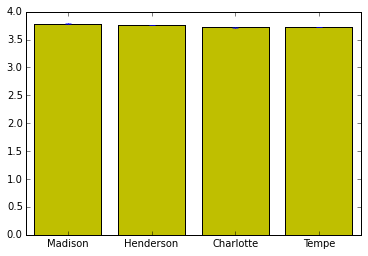

In [252]:
#LABELS = ['Madison', 'Henderson', 'Charlotte', 'Tempe']
pylab.bar(city_list, [star_mad, star_hen, star_cha, star_tem], align='center', yerr=[star_mad_error, star_hen_error, star_cha_error, star_tem_error], color='y')
pylab.xticks(city_list, LABELS)